In [51]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

In [53]:
class AudioBase(ABC):

    @abstractmethod
    def load_audio(self, path):
        pass

    @abstractmethod
    def get_duration(self):
        pass

    @abstractmethod
    def plot_waveform(self):
        pass

In [55]:
class AudioAnalyzer(AudioBase):
    def __init__(self, path):
        self.path = path
        self.data = None
        self.sr = None  # sample rate
        self.duration = 0
        self.energy = 0

    def load_audio(self, path=None):
        if path is None:
            path = self.path
        self.data, self.sr = librosa.load(path)
        self.duration = librosa.get_duration(y=self.data, sr=self.sr)
        self.energy = np.mean(self.data ** 2)
        return self.data, self.sr

    def get_duration(self):
        return self.duration

    def plot_waveform(self):
        plt.figure(figsize=(8, 3))
        plt.title(f"Forma de honda: {os.path.basename(self.path)}")
        plt.plot(self.data)
        plt.xlabel("muestras")
        plt.ylabel("Amplitud")
        plt.show()

In [57]:
class BatchAudioAnalyzer:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.results = []

    def analyze_folder(self, path=None):
        if path is None:
            path = self.folder_path

        for item in os.listdir(path):
            full_path = os.path.join(path, item)
            if os.path.isdir(full_path):
                
                self.analyze_folder(full_path)
            elif item.endswith(".wav"):
                analyzer = AudioAnalyzer(full_path)
                analyzer.load_audio()
                result = {
                    "file": item,
                    "duration": analyzer.get_duration(),
                    "energy": analyzer.energy
                }
                self.results.append(result)
                analyzer.plot_waveform()

        return self.results

Ingrese la ruta de la carpeta con archivos .wav:  C:\Users\JORGE\Downloads\archivos WAV


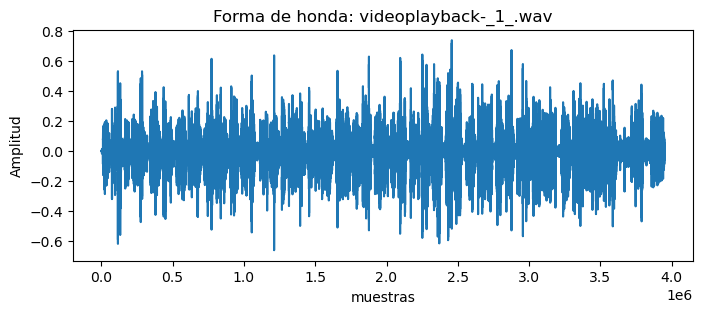

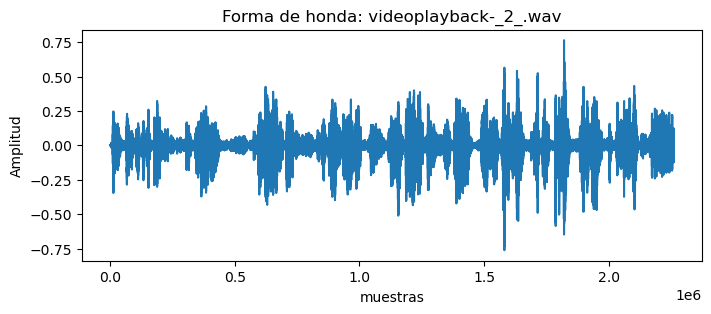


Resultados del análisis:
videoplayback-_1_.wav: 179.19 segundos, energía 0.0036
videoplayback-_2_.wav: 102.52 segundos, energía 0.0029


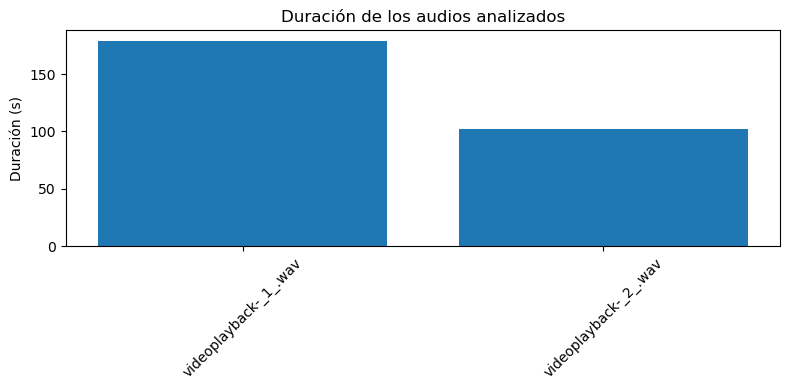

In [59]:
if __name__ == "__main__":
    folder = input("Ingrese la ruta de la carpeta con archivos .wav: ")

    batch = BatchAudioAnalyzer(folder)
    results = batch.analyze_folder()

   
    print("\nResultados del análisis:")
    for r in results:
        print(f"{r['file']}: {r['duration']:.2f} segundos, energía {r['energy']:.4f}")

    
    names = [r['file'] for r in results]
    durations = [r['duration'] for r in results]

    plt.figure(figsize=(8, 4))
    plt.bar(names, durations)
    plt.xticks(rotation=45)
    plt.ylabel("Duración (s)")
    plt.title("Duración de los audios analizados")
    plt.tight_layout()
    plt.show()